# Corizo - Data Science Minor Project (Stock Price Prediction)

## By - Pragati Gola (March - Self Paced)

## Instructions

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

### importing necessary Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading files

In [45]:
stock_price = pd.read_csv("1729258-1613615-Stock_Price_data_set_(1).csv")
stock_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [46]:
# Exploring first ten rows of the dataset using head function
stock_price.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [47]:
# Exploring dataset again using tail function
stock_price.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,387.149994,32346000
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,366.420013,15145800
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [48]:
dup = stock_price['Date'].drop_duplicates()
dup.shape

(1009,)

### There are 1009 dates in dataset.

In [49]:
dup = stock_price['Open'].drop_duplicates()
dup.shape

(976,)

In [50]:
dup = stock_price['Close'].drop_duplicates()
dup.shape

(988,)

### The stock is Open and Close 976 and 988 times respectively.

In [51]:
dup = stock_price['High'].drop_duplicates()
dup.shape

(983,)

In [52]:
dup = stock_price['Low'].drop_duplicates()
dup.shape

(989,)

### The stock is High and Low 983 and 989 times respectively.

In [53]:
dup = stock_price['Adj Close'].drop_duplicates()
dup.shape

(988,)

In [54]:
dup = stock_price['Volume'].drop_duplicates()
dup.shape

(1005,)

In [55]:
# To examine the summary of continuous data
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [56]:
# Check datatype of each column
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [57]:
# Check null values using isnull function
stock_price.isnull()                    

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False


In [86]:
stock_price.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


### So , dataset have no null values.

In [85]:
print(stock_price.shape)
print(stock_price.columns)

(1009, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


### Dataset contain 1009 rows and 7 columns.

<AxesSubplot:xlabel='Open', ylabel='Close'>

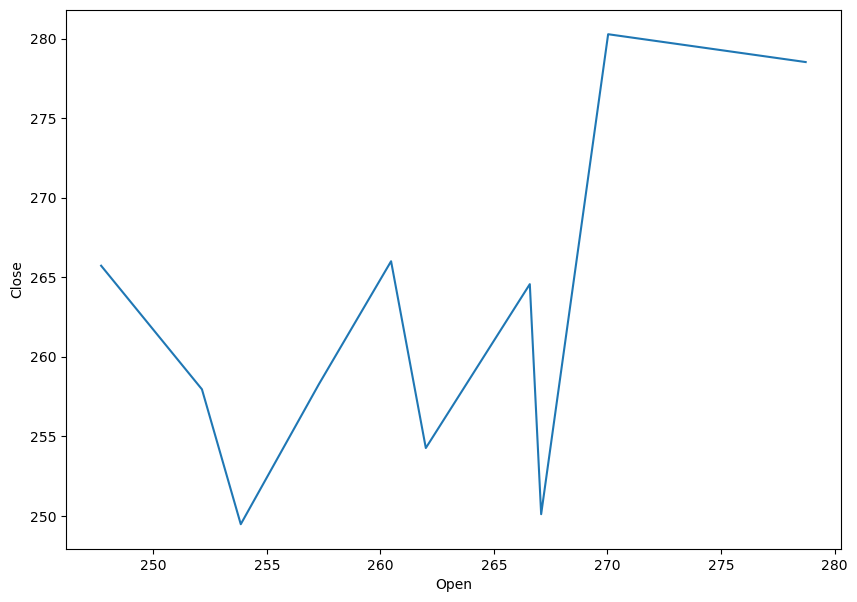

In [83]:
#Creating line plot to see the trend in opening and closing the stock.
plt.figure(figsize = (10,7))
sns.lineplot(x = 'Open' , y = 'Close', data = stock_price.head(10))

<AxesSubplot:xlabel='Open', ylabel='Close'>

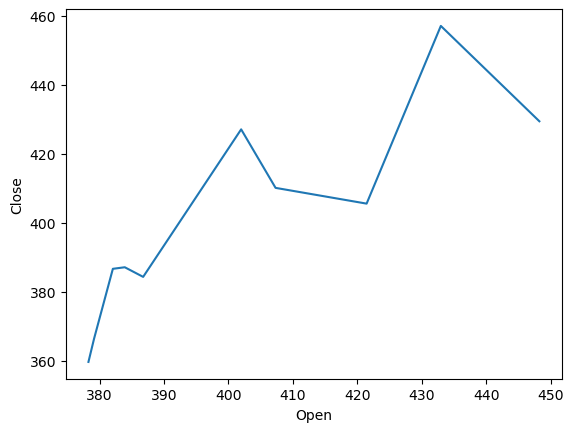

In [66]:
sns.lineplot(x = 'Open' ,y = 'Close' ,data = stock_price.tail(10))

<AxesSubplot:xlabel='High', ylabel='Low'>

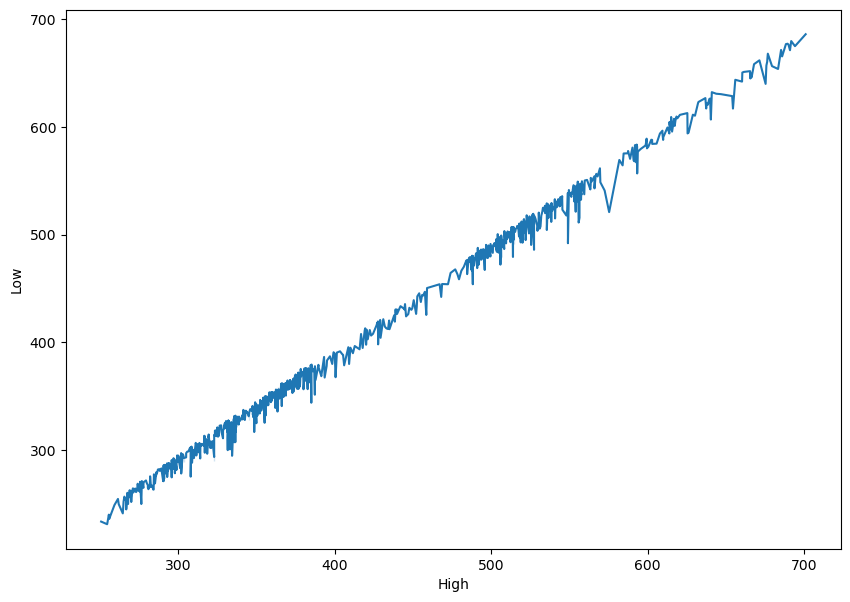

In [81]:
# Now creating line plot to see relation between high and low price of stock
plt.figure(figsize = (10,7))
sns.lineplot(x = 'High' , y = 'Low' , data = stock_price)

<AxesSubplot:xlabel='High', ylabel='Low'>

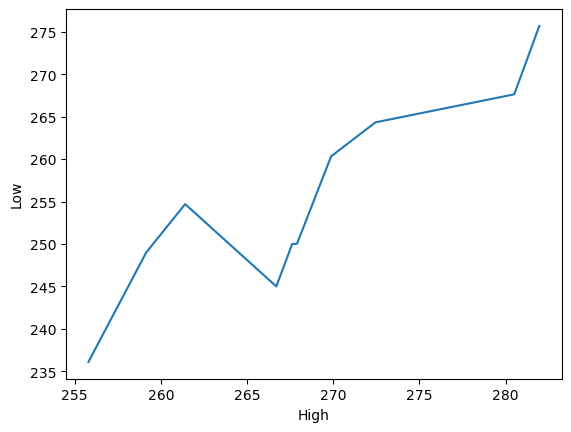

In [68]:
sns.lineplot(x = 'High' , y = 'Low' , data = stock_price.head(10))

<AxesSubplot:xlabel='High', ylabel='Low'>

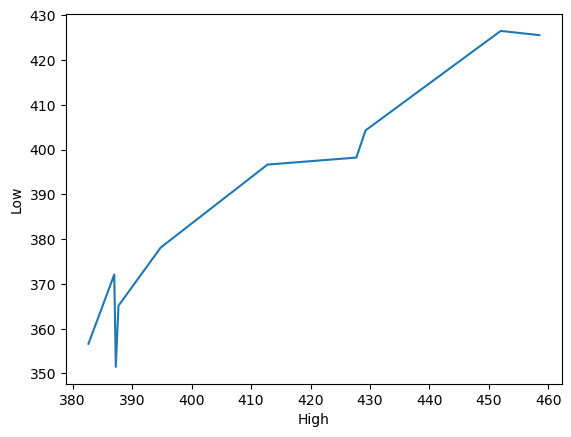

In [69]:
sns.lineplot(x = 'High' , y = 'Low' , data = stock_price.tail(10))

<AxesSubplot:xlabel='Close', ylabel='Adj Close'>

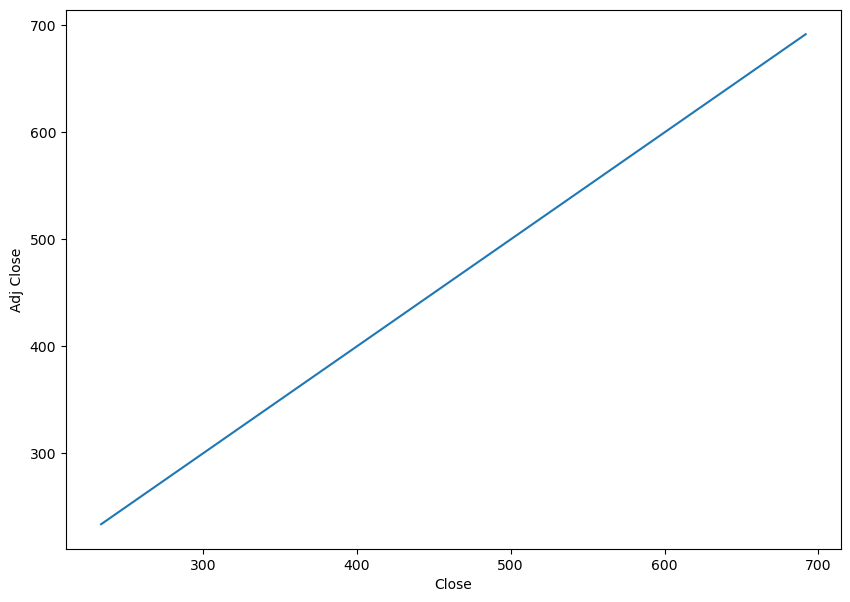

In [70]:
# Drawing the plot between Adjusted close and close to see the tremd between them.
plt.figure(figsize = (10,7))
sns.lineplot(x = 'Close', y = 'Adj Close' , data = stock_price)

### In above graph we can see no deviation between Adj Close and close and we have stright line. 